In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('./datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df[['Age','EstimatedSalary','Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [6]:
X_scaled.shape

(400, 2)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=2)

In [8]:
X_train.shape

(320, 2)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Batch GD:

In [20]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train,y_train,epochs=10,batch_size=320,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9258 - loss: 0.2679 - val_accuracy: 0.9219 - val_loss: 0.2291
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.9219 - loss: 0.2636 - val_accuracy: 0.9219 - val_loss: 0.2250
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.9219 - loss: 0.2609 - val_accuracy: 0.9219 - val_loss: 0.2221
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.9219 - loss: 0.2589 - val_accuracy: 0.9219 - val_loss: 0.2197
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.9219 - loss: 0.2572 - val_accuracy: 0.9219 - val_loss: 0.2176
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.9219 - loss: 0.2558 - val_accuracy: 0.9219 - val_loss: 0.2158
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9219 - loss: 0.2545 - val_accuracy: 0.9219 - val_loss: 0.2141
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.9219 - loss: 0.2534 - val_accuracy: 0.9219 - val_loss: 0.

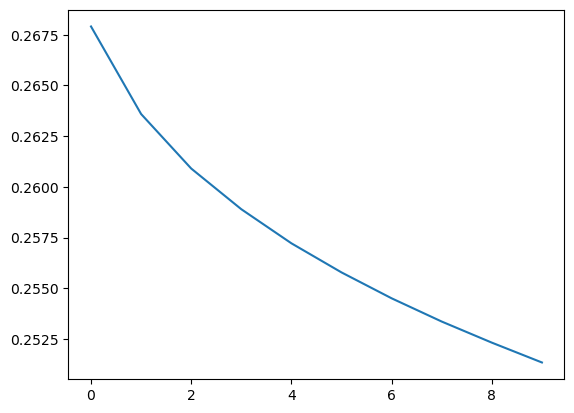

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [17]:
# Stochastic GD

In [22]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train, y_train, epochs=10,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9247 - loss: 0.2538 - val_accuracy: 0.9219 - val_loss: 0.2245
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9214 - loss: 0.2580 - val_accuracy: 0.9219 - val_loss: 0.2408
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9124 - loss: 0.3169 - val_accuracy: 0.9219 - val_loss: 0.2422
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8665 - loss: 0.4986 - val_accuracy: 0.9219 - val_loss: 0.2419
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9328 - loss: 0.2728 - val_accuracy: 0.9219 - val_loss: 0.2594
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9361 - loss: 0.2435 - val_accuracy: 0.9219 - val_loss: 0.2453
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9168 - loss: 0.2653 - val_accuracy: 0.9219 - val_loss: 0.2406
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9373 - loss: 0.2759 - val_accuracy: 0.

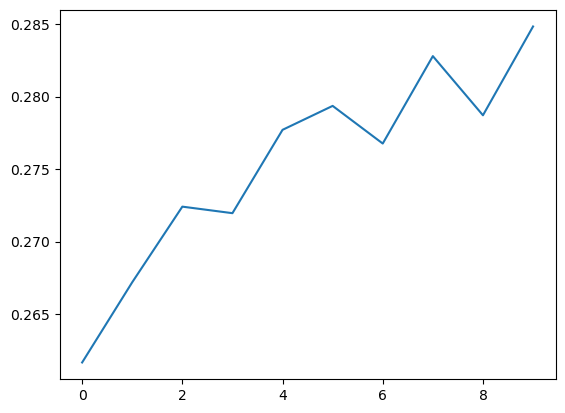

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [26]:
# Let's increase the number of epochs!

In [27]:
# Stochastic GD

In [24]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train, y_train, epochs=100,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8958 - loss: 0.3926 - val_accuracy: 0.9219 - val_loss: 0.2535
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9527 - loss: 0.2010 - val_accuracy: 0.9219 - val_loss: 0.2541
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9394 - loss: 0.2290 - val_accuracy: 0.9219 - val_loss: 0.2484
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9437 - loss: 0.2283 - val_accuracy: 0.9219 - val_loss: 0.2490
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8984 - loss: 0.3310 - val_accuracy: 0.9219 - val_loss: 0.2560
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9099 - loss: 0.3603 - val_accuracy: 0.9219 - val_loss: 0.2686
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9241 - loss: 0.3463 - val_accuracy: 0.9219 - val_loss: 0.2614
Epoch 8/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9295 - loss: 0.2884 - val_accu

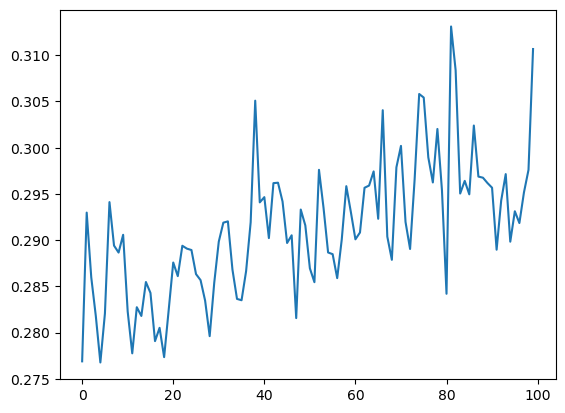

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [28]:
# Batch GD:

In [29]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train, y_train, epochs=100,batch_size=256,validation_split=0.2)
print(time.time() - start)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9219 - loss: 0.2984 - val_accuracy: 0.9219 - val_loss: 0.2548
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.9219 - loss: 0.2914 - val_accuracy: 0.9219 - val_loss: 0.2482
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.9219 - loss: 0.2868 - val_accuracy: 0.9219 - val_loss: 0.2433
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.9219 - loss: 0.2832 - val_accuracy: 0.9219 - val_loss: 0.2392
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.9180 - loss: 0.2803 - val_accuracy: 0.9219 - val_loss: 0.2354
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9141 - loss: 0.2779 - val_accuracy: 0.9219 - val_loss: 0.2321
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.9141 - loss: 0.2758 - val_accuracy: 0.9219 - val_loss: 0.2293
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9141 - loss: 0.2739 - val_accuracy: 0.9219 - val_

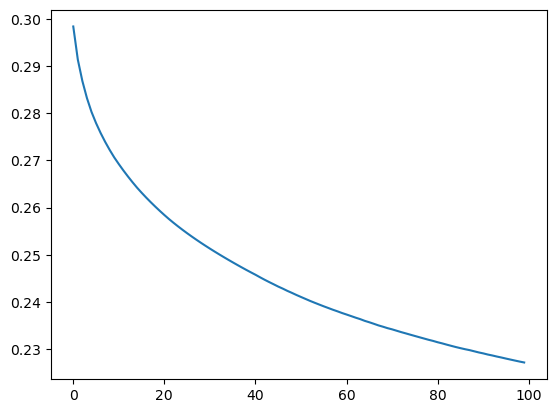

In [30]:
plt.plot(history.history['loss'])

In [31]:
# Let's try out for mini - batch GD

In [32]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train, y_train, epochs=100,batch_size=64,validation_split=0.2)
print(time.time() - start)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.9047 - loss: 0.2233 - val_accuracy: 0.9219 - val_loss: 0.1855
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9115 - loss: 0.2036 - val_accuracy: 0.9219 - val_loss: 0.1852
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9193 - loss: 0.1874 - val_accuracy: 0.9219 - val_loss: 0.1854
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8943 - loss: 0.2702 - val_accuracy: 0.9219 - val_loss: 0.1854
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9328 - loss: 0.1740 - val_accuracy: 0.9219 - val_loss: 0.1856
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9234 - loss: 0.1883 - val_accuracy: 0.9219 - val_loss: 0.1855
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9156 - loss: 0.2077 - val_accuracy: 0.9219 - val_loss: 0.1855
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9042 - loss: 0.2212 - val_accuracy: 0.9219 - val_loss

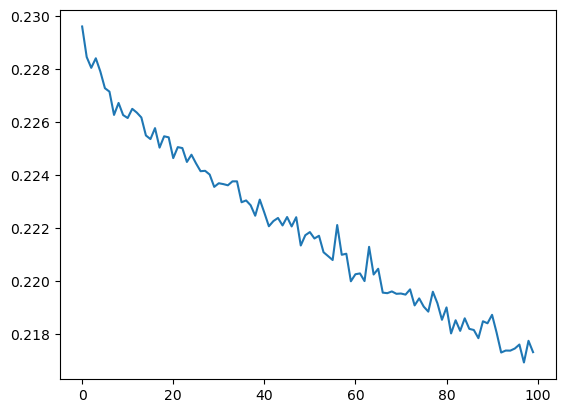

In [33]:
plt.plot(history.history['loss'])

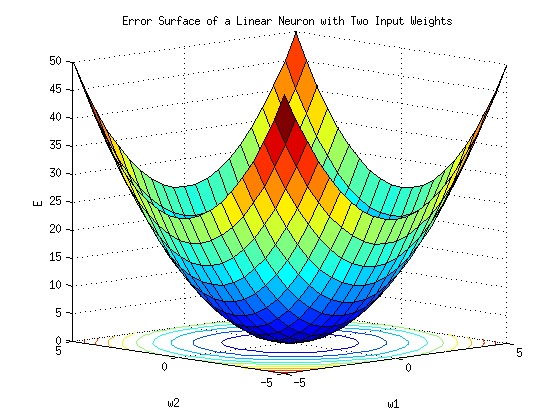

In [35]:
from IPython.display import display, Image

# Display image from file
display(Image(filename='./4. loss_landscape.png'))


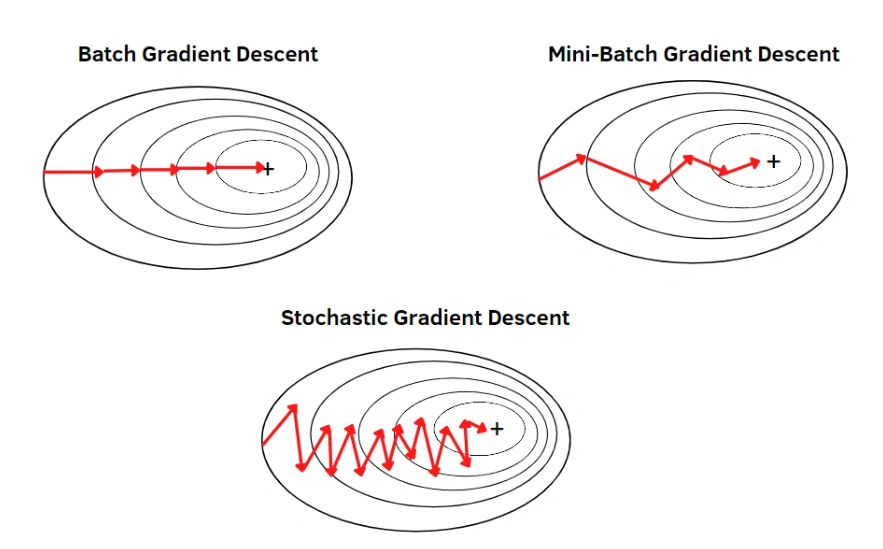

In [37]:
from IPython.display import display, Image

# Display image from file
display(Image(filename='./4. variations_GD.png'))
